In [12]:
!pip install vaderSentiment

In [13]:
from IPython import display
import math
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [14]:
import pandas as pd
import numpy as np

In [15]:
import string

In [16]:
import re

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv("final_news_apple.csv")
data = data.dropna()
print(data.head())

         Date                                           Headline  Movement
0  2012-07-16               Waiting For Direction On The Markets         1
1  2012-07-19  Mid Year Update  U S  And Canadian Stock Marke...         1
2  2012-07-23                         Trade Apple After Earnings         0
3  2012-07-23     Apple Earnings Preview  Quarterly Dip On Deck          0
4  2012-07-23               Summer Heat Scorches Europe And U S          0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tanmay'PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
data

,Date,Headline,Movement
0,2012-07-16,Waiting For Direction On The Markets,1
1,2012-07-19,Mid Year Update U S And Canadian Stock Marke...,1
2,2012-07-23,Trade Apple After Earnings,0
3,2012-07-23,Apple Earnings Preview Quarterly Dip On Deck,0
4,2012-07-23,Summer Heat Scorches Europe And U S,0
...,...,...,...
22087,2022-06-21,Tencent forms 'extended reality' unit as metav...,1
22088,2022-06-21,"US STOCKS-Megacap, energy shares lead broad Wa...",1
22089,2022-06-22,Volkswagen CEO questions whether Apple plans t...,0
22090,2022-06-22,"Shopify unveils new tools, Twitter tie-up to b...",0


In [19]:
data.drop(['Movement'], axis = 1)

,Date,Headline
0,2012-07-16,Waiting For Direction On The Markets
1,2012-07-19,Mid Year Update U S And Canadian Stock Marke...
2,2012-07-23,Trade Apple After Earnings
3,2012-07-23,Apple Earnings Preview Quarterly Dip On Deck
4,2012-07-23,Summer Heat Scorches Europe And U S
...,...,...
22087,2022-06-21,Tencent forms 'extended reality' unit as metav...
22088,2022-06-21,"US STOCKS-Megacap, energy shares lead broad Wa..."
22089,2022-06-22,Volkswagen CEO questions whether Apple plans t...
22090,2022-06-22,"Shopify unveils new tools, Twitter tie-up to b..."


In [20]:
from nltk.corpus import stopwords

In [21]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [22]:
data[["Headline"]]
data["Headline"] = data["Headline"].astype(str)
data.head()

,Date,Headline,Movement
0,2012-07-16,Waiting For Direction On The Markets,1
1,2012-07-19,Mid Year Update U S And Canadian Stock Marke...,1
2,2012-07-23,Trade Apple After Earnings,0
3,2012-07-23,Apple Earnings Preview Quarterly Dip On Deck,0
4,2012-07-23,Summer Heat Scorches Europe And U S,0


In [23]:
data["Headline"] = data["Headline"].str.lower()
data.head()

,Date,Headline,Movement
0,2012-07-16,waiting for direction on the markets,1
1,2012-07-19,mid year update u s and canadian stock marke...,1
2,2012-07-23,trade apple after earnings,0
3,2012-07-23,apple earnings preview quarterly dip on deck,0
4,2012-07-23,summer heat scorches europe and u s,0


In [24]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["Headline"] = data["Headline"].apply(lambda text: remove_punctuation(text))
data.head()

,Date,Headline,Movement
0,2012-07-16,waiting for direction on the markets,1
1,2012-07-19,mid year update u s and canadian stock marke...,1
2,2012-07-23,trade apple after earnings,0
3,2012-07-23,apple earnings preview quarterly dip on deck,0
4,2012-07-23,summer heat scorches europe and u s,0


In [25]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [26]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["Headline"] = data["Headline"].apply(lambda text: remove_stopwords(text))
data.head()

,Date,Headline,Movement
0,2012-07-16,waiting direction markets,1
1,2012-07-19,mid year update u canadian stock markets sector,1
2,2012-07-23,trade apple earnings,0
3,2012-07-23,apple earnings preview quarterly dip deck,0
4,2012-07-23,summer heat scorches europe u,0


In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
stemmer = PorterStemmer()
""""
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["Headline"] = data["Headline"].apply(lambda text: stem_words(text))
data.head() """

'"\ndef stem_words(text):\n    return " ".join([stemmer.stem(word) for word in text.split()])\n\ndata["Headline"] = data["Headline"].apply(lambda text: stem_words(text))\ndata.head() '

In [29]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Headline"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Headline"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Headline"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Headline"]]
data.head()

,Date,Headline,Movement,Positive,Negative,Neutral,Compound
0,2012-07-16,waiting direction markets,1,0.0,0.0,1.0,0.0
1,2012-07-19,mid year update u canadian stock markets sector,1,0.0,0.0,1.0,0.0
2,2012-07-23,trade apple earnings,0,0.0,0.0,1.0,0.0
3,2012-07-23,apple earnings preview quarterly dip deck,0,0.0,0.0,1.0,0.0
4,2012-07-23,summer heat scorches europe u,0,0.0,0.0,1.0,0.0


In [30]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append(1)
    elif i <= -0.05 :
        sentiment.append(-1)
    else:
        sentiment.append(0)
data["Sentiment"] = sentiment
data.head()

,Date,Headline,Movement,Positive,Negative,Neutral,Compound,Sentiment
0,2012-07-16,waiting direction markets,1,0.0,0.0,1.0,0.0,0
1,2012-07-19,mid year update u canadian stock markets sector,1,0.0,0.0,1.0,0.0,0
2,2012-07-23,trade apple earnings,0,0.0,0.0,1.0,0.0,0
3,2012-07-23,apple earnings preview quarterly dip deck,0,0.0,0.0,1.0,0.0,0
4,2012-07-23,summer heat scorches europe u,0,0.0,0.0,1.0,0.0,0


In [31]:
print(data["Sentiment"].value_counts())

 0    9945
 1    7554
-1    4593
Name: Sentiment, dtype: int64


In [32]:
print(data.groupby(['Sentiment']).count())

           Date  Headline  Movement  Positive  Negative  Neutral  Compound
Sentiment                                                                 
-1         4593      4593      4593      4593      4593     4593      4593
 0         9945      9945      9945      9945      9945     9945      9945
 1         7554      7554      7554      7554      7554     7554      7554


In [33]:
data.Sentiment.value_counts()/len(data)

 0    0.450163
 1    0.341934
-1    0.207903
Name: Sentiment, dtype: float64

In [34]:
data[data.Sentiment==0]

,Date,Headline,Movement,Positive,Negative,Neutral,Compound,Sentiment
0,2012-07-16,waiting direction markets,1,0.0,0.0,1.0,0.0,0
1,2012-07-19,mid year update u canadian stock markets sector,1,0.0,0.0,1.0,0.0,0
2,2012-07-23,trade apple earnings,0,0.0,0.0,1.0,0.0,0
3,2012-07-23,apple earnings preview quarterly dip deck,0,0.0,0.0,1.0,0.0,0
4,2012-07-23,summer heat scorches europe u,0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...
22080,2022-06-21,meta tech giants form metaverse standards body...,1,0.0,0.0,1.0,0.0,0
22087,2022-06-21,tencent forms extended reality unit metaverse ...,1,0.0,0.0,1.0,0.0,0
22089,2022-06-22,volkswagen ceo questions whether apple plans p...,0,0.0,0.0,1.0,0.0,0
22090,2022-06-22,shopify unveils new tools twitter tieup beat e...,0,0.0,0.0,1.0,0.0,0


In [35]:
data = data[data.Sentiment != 0]


In [36]:
data

,Date,Headline,Movement,Positive,Negative,Neutral,Compound,Sentiment
7,2012-07-30,bulls snatch victory jaws defeat,1,0.000,0.429,0.571,-0.4588,-1
8,2012-07-31,50 stocks best dividend growth july 2012,1,0.576,0.000,0.424,0.7783,1
12,2012-08-02,sector detector bulls look central banks support,1,0.310,0.000,0.690,0.4019,1
15,2012-08-10,good knight public markets,1,0.492,0.000,0.508,0.4404,1
16,2012-08-14,largest usa tech companies earnings plunge app...,1,0.130,0.000,0.870,0.0516,1
...,...,...,...,...,...,...,...,...
22083,2022-06-21,us stockswall street bounces growth energy sto...,1,0.439,0.000,0.561,0.5719,1
22084,2022-06-21,us stockstech energy shares boost wall st bear...,1,0.500,0.000,0.500,0.7184,1
22085,2022-06-21,us stockswall street set strong open bruising ...,1,0.320,0.000,0.680,0.5106,1
22086,2022-06-21,us stocksfutures jump worst week sp 500 since ...,1,0.000,0.313,0.687,-0.6249,-1


In [57]:
data.drop(['Positive', 'Negative', 'Neutral', 'Compound','Movement'], axis = 1)

,Date,Headline,Sentiment
7,2012-07-30,bulls snatch victory jaws defeat,-1
8,2012-07-31,50 stocks best dividend growth july 2012,1
12,2012-08-02,sector detector bulls look central banks support,1
15,2012-08-10,good knight public markets,1
16,2012-08-14,largest usa tech companies earnings plunge app...,1
...,...,...,...
22083,2022-06-21,us stockswall street bounces growth energy sto...,1
22084,2022-06-21,us stockstech energy shares boost wall st bear...,1
22085,2022-06-21,us stockswall street set strong open bruising ...,1
22086,2022-06-21,us stocksfutures jump worst week sp 500 since ...,-1


In [59]:
corpus=[]
for val in data['Headline']:
    corpus.append(val)

In [60]:
corpus

['bulls snatch victory jaws defeat',
 '50 stocks best dividend growth july 2012',
 'sector detector bulls look central banks support',
 'good knight public markets',
 'largest usa tech companies earnings plunge apple still dominates',
 'pressure released breakout apple edge',
 'stocks end small losses late gains financial stocks help limit',
 'serious divergence dow p eur usd',
 'aapl impossible move double top',
 'big tech profits soften hp microsoft amazon plunge',
 'warning signals keep multiplying',
 'stock market strategy back testing lies myths truth part 1',
 'gaming apple shares fun profit',
 'scumballs triumph apple',
 'overbought relief',
 'attention bulls may majorly disappointed',
 'markets trade higher session paring gains near bell',
 'big tech assets rise apple reaches record 163 billion',
 'closer look apple buying opportunity',
 'apple computer true bullish impulse leg',
 'apple become drag market',
 'qe3 misconceptions profit',
 'google defies gravity 12 consecutive w

In [61]:
print("Positive headlines:\n")
pprint(list(data[data['Sentiment'] == 1].Headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(data[data['Sentiment'] == -1].Headline)[:5], width=200)


Positive headlines:

['50 stocks best dividend growth july 2012',
 'sector detector bulls look central banks support',
 'good knight public markets',
 'largest usa tech companies earnings plunge apple still dominates',
 'stocks end small losses late gains financial stocks help limit']

Negative headlines:

['bulls snatch victory jaws defeat',
 'pressure released breakout apple edge',
 'serious divergence dow p eur usd',
 'warning signals keep multiplying',
 'stock market strategy back testing lies myths truth part 1']


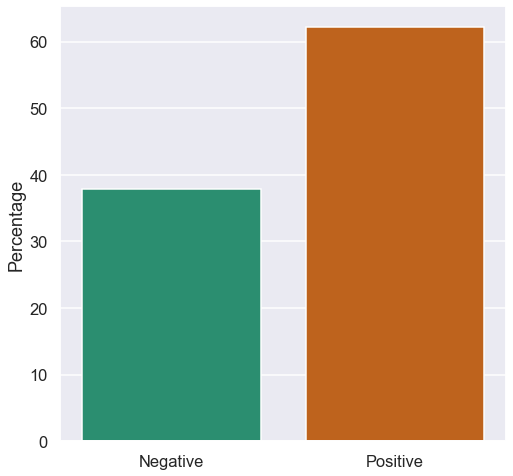

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = data.Sentiment.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


In [64]:
feature_vector =  cv.fit(data.Headline)

In [65]:
data_features =  cv.transform(data.Headline)

In [66]:
features = feature_vector.get_feature_names()

c:\Users\Tanmay'PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
features_counts = np.sum(data_features.toarray(), axis = 0)

In [68]:
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

In [69]:
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
89,apple,2361
389,earnings,1201
1199,stocks,1134
1334,us,898
1198,stock,858
1285,top,653
1262,tech,606
572,growth,604
68,amazon,548
1109,shares,537


In [70]:
analyzer = CountVectorizer().build_analyzer()

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [84]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = './BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [71]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(data_features, data.Sentiment, 
                                                     test_size = 0.3, random_state = 42)

In [72]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [73]:
data_predicted = nb_clf.predict(test_x.toarray())

In [74]:
from sklearn import metrics
print(metrics.classification_report(test_y,data_predicted))

              precision    recall  f1-score   support

          -1       0.80      0.80      0.80      1331
           1       0.88      0.89      0.89      2314

    accuracy                           0.85      3645
   macro avg       0.84      0.84      0.84      3645
weighted avg       0.85      0.85      0.85      3645



<AxesSubplot:>

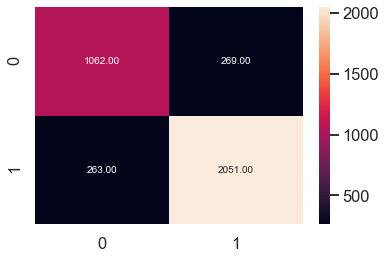

In [75]:
cm = metrics.confusion_matrix(test_y, data_predicted)
sns.heatmap(cm, annot=True, fmt = '.2f')

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, data_predicted)

0.8540466392318244

In [77]:
data

,Date,Headline,Movement,Positive,Negative,Neutral,Compound,Sentiment
7,2012-07-30,bulls snatch victory jaws defeat,1,0.000,0.429,0.571,-0.4588,-1
8,2012-07-31,50 stocks best dividend growth july 2012,1,0.576,0.000,0.424,0.7783,1
12,2012-08-02,sector detector bulls look central banks support,1,0.310,0.000,0.690,0.4019,1
15,2012-08-10,good knight public markets,1,0.492,0.000,0.508,0.4404,1
16,2012-08-14,largest usa tech companies earnings plunge app...,1,0.130,0.000,0.870,0.0516,1
...,...,...,...,...,...,...,...,...
22083,2022-06-21,us stockswall street bounces growth energy sto...,1,0.439,0.000,0.561,0.5719,1
22084,2022-06-21,us stockstech energy shares boost wall st bear...,1,0.500,0.000,0.500,0.7184,1
22085,2022-06-21,us stockswall street set strong open bruising ...,1,0.320,0.000,0.680,0.5106,1
22086,2022-06-21,us stocksfutures jump worst week sp 500 since ...,1,0.000,0.313,0.687,-0.6249,-1


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [82]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(nb_clf, './Classifier_Sentiment_Model') 

['./Classifier_Sentiment_Model']